In [1]:
from datasets import load_dataset

ds = load_dataset("ashraq/fashion-product-images-small")

/Users/carolinanami/Desktop/Ironhack/Week 1/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Install: pip install datasets
import requests
from PIL import Image
import pandas as pd
from pathlib import Path

# Load dataset from HuggingFace
print("Loading product dataset...")
try:
    # Try loading the dataset using the 'ds' variable from the first cell
    dataset = ds['train'].select(range(100))  # First 100 samples
    print(f"✓ Loaded {len(dataset)} products")

    # Convert to pandas for easier manipulation
    products_df = pd.DataFrame(dataset)
    print(f"Dataset columns: {products_df.columns.tolist()}")

except Exception as e:
    print(f"⚠ Could not process the 'ds' dataset: {e}")
    print("Using local images instead...")

    # Alternative: Use local images
    # Create a products.json file with product information
    products_data = [
        {
            "id": 1,
            "name": "Wireless Headphones",
            "price": 79.99,
            "category": "Electronics",
            "image_path": "images/product1.jpg"
        },
        # Add more products...
    ]

    products_df = pd.DataFrame(products_data)

# Create images directory
images_dir = Path("product_images")
images_dir.mkdir(exist_ok=True)

print(f"\n✓ Dataset prepared!")
print(f"  Total products: {len(products_df)}")

Loading product dataset...
✓ Loaded 100 products
Dataset columns: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image']

✓ Dataset prepared!
  Total products: 100


In [3]:
!pip install datasets pillow

In [4]:
from datasets import load_dataset
from PIL import Image
import base64
import io

In [5]:
ds = load_dataset("ashraq/fashion-product-images-small", split="train")
print(ds)

Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 44072
})


In [6]:
def image_to_base64(pil_image, format="JPEG"):
    buffer = io.BytesIO()
    pil_image.save(buffer, format=format)
    encoded_string = base64.b64encode(buffer.getvalue()).decode("utf-8")
    return encoded_string

In [7]:
sample = ds[0]

image = sample["image"]  # PIL Image
encoded_image = image_to_base64(image)

print("Base64 string length:", len(encoded_image))
print("Base64 preview:", encoded_image[:100])

Base64 string length: 2388
Base64 preview: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx


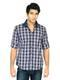

In [ ]:
decoded_bytes = base64.b64decode(encoded_image)
decoded_image = Image.open(io.BytesIO(decoded_bytes))

decoded_image

In [8]:
def create_product_listing_prompt(product_name, price, category, additional_info=None):
    """
    Create a prompt for generating product listings.

    Parameters:
    - product_name: Name of the product
    - price: Price of the product
    - category: Product category
    - additional_info: Optional additional information

    Returns:
    - Formatted prompt string
    """
    prompt = f"""You are an expert e-commerce copywriter. Analyze the product image and create a compelling product listing.

Product Information:
- Name: {product_name}
- Price: ${price:.2f}
- Category: {category}
{f'- Additional Info: {additional_info}' if additional_info else ''}

Please create a professional product listing that includes:

1. **Product Title** (catchy, SEO-friendly, 60 characters max)
2. **Product Description** (detailed, 150-200 words)
   - Highlight key features and benefits
   - Use persuasive language
   - Include relevant details visible in the image
3. **Key Features** (bullet points, 5-7 items)
4. **SEO Keywords** (comma-separated, 10-15 relevant keywords)

Format your response as JSON with the following structure:
{{
    "title": "Product title here",
    "description": "Full description here",
    "features": ["Feature 1", "Feature 2", ...],
    "keywords": "keyword1, keyword2, ..."
}}

Be specific about what you see in the image. Mention colors, materials, design elements, and any distinctive features."""

    return prompt

# Test prompt creation
test_prompt = create_product_listing_prompt(
    product_name="Wireless Bluetooth Headphones",
    price=79.99,
    category="Electronics",
    additional_info="Noise cancelling, 30-hour battery"
)

print("\n" + "="*50)
print("PROMPT TEMPLATE")
print("="*50)
print(test_prompt[:500] + "...")  # Show first 500 characters



PROMPT TEMPLATE
You are an expert e-commerce copywriter. Analyze the product image and create a compelling product listing.

Product Information:
- Name: Wireless Bluetooth Headphones
- Price: $79.99
- Category: Electronics
- Additional Info: Noise cancelling, 30-hour battery

Please create a professional product listing that includes:

1. **Product Title** (catchy, SEO-friendly, 60 characters max)
2. **Product Description** (detailed, 150-200 words)
   - Highlight key features and benefits
   - Use persuasive ...


In [9]:

import os
from dotenv import load_dotenv
import base64
import json
from pathlib import Path
from openai import OpenAI
from PIL import Image
import requests
import io

In [ ]:
# Load API key from .env
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

# Initialize OpenAI client
client = OpenAI(api_key=api_key)

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [11]:
import os
from dotenv import load_dotenv
import base64
import json
from pathlib import Path
from PIL import Image
import requests
import io

print("🔍 DEBUGGING API KEY ISSUE")
print("="*50)

# Load environment variables
load_dotenv()

# Check what's in the .env file
print("1. Checking .env file location...")
print(f"   Current directory: {os.getcwd()}")

# List files to see .env
print("\n2. Files in current directory:")
for file in os.listdir():
    if file.startswith('.') or file.endswith('.env'):
        print(f"   - {file}")

# Try different .env loading methods
print("\n3. Trying to load API key...")

# Method 1: Direct from dotenv
api_key_from_dotenv = os.getenv("OPENAI_API_KEY")
print(f"   Method 1 (dotenv): {'✅ Found' if api_key_from_dotenv else '❌ Not found'}")

# Method 2: Try os.environ directly
api_key_direct = os.environ.get("OPENAI_API_KEY")
print(f"   Method 2 (os.environ): {'✅ Found' if api_key_direct else '❌ Not found'}")

# Method 3: Try with different key names (common variations)
possible_keys = ["OPENAI_API_KEY", "OPENAI_KEY", "OPENAI_API", "API_KEY"]
for key in possible_keys:
    value = os.getenv(key)
    if value:
        print(f"   Found alternative key '{key}': ✅")
        api_key_from_dotenv = value
        break

if api_key_from_dotenv:
    print(f"\n✅ API Key loaded successfully!")
    print(f"   First 8 chars: {api_key_from_dotenv[:8]}...")
    print(f"   Key length: {len(api_key_from_dotenv)} chars")
    
    # Test if it looks like a valid OpenAI key
    if api_key_from_dotenv.startswith('sk-'):
        print("   ✅ Key format looks correct (starts with 'sk-')")
    else:
        print("   ⚠ Key doesn't start with 'sk-', but might still work")
else:
    print("\n❌ NO API KEY FOUND!")
    print("\n🔧 FIX OPTIONS:")
    print("   1. Check your .env file exists in the same folder as your notebook")
    print("   2. Ensure .env file contains: OPENAI_API_KEY=sk-...")
    print("   3. Restart VS Code/Jupyter kernel after creating .env file")
    print("   4. Or use the manual setup below")

🔍 DEBUGGING API KEY ISSUE
1. Checking .env file location...
   Current directory: /Users/carolinanami/Desktop/Ironhack/Week 1/Day 4/Lab API

2. Files in current directory:

3. Trying to load API key...
   Method 1 (dotenv): ❌ Not found
   Method 2 (os.environ): ❌ Not found

❌ NO API KEY FOUND!

🔧 FIX OPTIONS:
   1. Check your .env file exists in the same folder as your notebook
   2. Ensure .env file contains: OPENAI_API_KEY=sk-...
   3. Restart VS Code/Jupyter kernel after creating .env file
   4. Or use the manual setup below


In [12]:
# FIND THE KEY
import os
from dotenv import load_dotenv

# Load from current directory
load_dotenv()

# Check if key loads
api_key = os.getenv("OPENAI_API_KEY")

if api_key:
    print(f"✅ SUCCESS! API Key loaded from .env file")
    print(f"   Key starts with: {api_key[:12]}...")
    print(f"   Key length: {len(api_key)} characters")
    
    if api_key.startswith('sk-'):
        print("   ✅ Format looks correct")
    else:
        print("   ⚠ Key doesn't start with 'sk-', but let's try it")
else:
    print("❌ ERROR: Still no API key found")
    print("   Make sure your .env file contains: OPENAI_API_KEY=sk-...")

✅ SUCCESS! API Key loaded from .env file
   Key starts with: sk-svcacct-m...
   Key length: 167 characters
   ✅ Format looks correct


In [13]:
# Initialize OpenAI client
from openai import OpenAI

try:
    client = OpenAI(api_key=api_key)
    print("✅ OpenAI client initialized successfully!")
except Exception as e:
    print(f"❌ Error initializing client: {e}")
    print("\nTrying alternative initialization...")
    
    # Alternative method
    import openai
    openai.api_key = api_key
    from openai import OpenAI
    client = OpenAI()
    print("✅ Client initialized with alternative method")

✅ OpenAI client initialized successfully!


In [14]:
# DIRECT COPY/PASTE
def test_connection():
    """Test if we can connect to OpenAI API"""
    print("\n" + "="*50)
    print("TESTING OPENAI CONNECTION")
    print("="*50)
    
    try:
        # Simple test - get available models
        models = client.models.list()
        print(f"✅ Connection successful!")
        print(f"   Available models: {len(models.data)}")
        
        # Check for vision model
        vision_models = [m.id for m in models.data if 'vision' in m.id or 'gpt-4' in m.id]
        if vision_models:
            print(f"   Recommended models for this lab: {vision_models[:3]}")
        else:
            print("   ⚠ No vision-specific models listed")
            print("   We'll try 'gpt-4-vision-preview' anyway")
        
        return True
        
    except Exception as e:
        print(f"❌ Connection test failed: {e}")
        print("\nPossible issues:")
        print("1. API key might be invalid or expired")
        print("2. No credit on your OpenAI account")
        print("3. Network/connection issues")
        return False

# Run the test
test_connection()


TESTING OPENAI CONNECTION
✅ Connection successful!
   Available models: 121
   Recommended models for this lab: ['gpt-4-0613', 'gpt-4', 'gpt-4o-mini-tts-2025-12-15']


True

In [15]:
# DIRECT COPY/PASTE
import base64
import json
from pathlib import Path
from PIL import Image
import requests
import io

def encode_image_to_base64(image_path):
    """
    Encode an image to base64 format for OpenAI API.
    """
    try:
        print(f"📷 Encoding image: {image_path}")
        
        # If image is a URL
        if isinstance(image_path, str) and image_path.startswith('http'):
            response = requests.get(image_path, timeout=10)
            image = Image.open(io.BytesIO(response.content))
        else:
            # Load from local file
            image_path = Path(image_path)
            if not image_path.exists():
                print(f"❌ Image not found: {image_path}")
                return None
            image = Image.open(image_path)
        
        # Resize if too large (to save tokens)
        if image.size[0] > 512 or image.size[1] > 512:
            image.thumbnail((512, 512))
            print(f"   Resized to: {image.size}")
        
        # Convert to RGB if needed
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        # Save to bytes and encode
        buffered = io.BytesIO()
        image.save(buffered, format="JPEG", quality=85)
        img_str = base64.b64encode(buffered.getvalue()).decode()
        
        print(f"✅ Image encoded successfully")
        return img_str
        
    except Exception as e:
        print(f"❌ Error encoding image: {e}")
        return None

def create_product_listing_prompt(product_name, price, category, additional_info=None):
    """
    Create prompt for product listing generation.
    """
    prompt = f"""You are an expert e-commerce copywriter. Analyze the product image and create a compelling product listing.

Product Information:
- Name: {product_name}
- Price: ${price}
- Category: {category}
{f'- Additional Info: {additional_info}' if additional_info else ''}

Please create a professional product listing that includes:

1. **Product Title** (catchy, 60 characters max)
2. **Product Description** (150-200 words)
3. **Key Features** (5-7 bullet points)
4. **SEO Keywords** (10-15 keywords)

Format as JSON with this structure:
{{
    "title": "string",
    "description": "string",
    "features": ["item1", "item2", ...],
    "keywords": "comma,separated,keywords"
}}

Be specific about what you see in the image."""
    
    return prompt

def generate_product_listing(image_base64, prompt_text, model="gpt-4-vision-preview"):
    """
    Call ChatGPT API with an image and prompt.
    """
    try:
        print("🔄 Calling ChatGPT API with vision...")
        
        response = client.chat.completions.create(
            model=model,
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": prompt_text},
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/jpeg;base64,{image_base64}",
                                "detail": "high"
                            }
                        }
                    ]
                }
            ],
            max_tokens=800,
            temperature=0.7,
        )
        
        content = response.choices[0].message.content
        print(f"✅ API call successful!")
        print(f"   Tokens used: {response.usage.total_tokens}")
        
        return {"success": True, "response": content}
        
    except Exception as e:
        print(f"❌ API Error: {e}")
        return {"success": False, "error": str(e)}

In [16]:

# Sample image URL (premium wireless headphones)
test_image_path = "https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400"

# Product details for the sample image
product_name = "Premium Wireless Headphones"
price = 129.99
category = "Electronics"
additional_info = "Noise cancelling, 40-hour battery life, Bluetooth 5.3"

print("="*60)
print("TEST: Single Product API Call with Sample Image")
print("="*60)
print("📷 Using sample image from Unsplash")
print(f"🛍️  Product: {product_name}")
print(f"💰 Price: ${price}")
print(f"📂 Category: {category}")
print(f"📝 Additional: {additional_info}")
print("="*60)

# Encode image
image_base64 = encode_image_to_base64(test_image_path)

if image_base64:
    # Create prompt
    prompt = create_product_listing_prompt(product_name, price, category, additional_info)
    
    print("\n📝 Prompt created successfully!")
    print("-"*40)
    print(prompt[:200] + "...")  # Show first 200 chars
    print("-"*40)
    
    # Call API
    result = generate_product_listing(image_base64, prompt)
    
    if result["success"]:
        print("\n✅ SUCCESS! Response received:")
        print("-"*40)
        print(result["response"])
        
        # Try to parse JSON
        try:
            listing_data = json.loads(result["response"])
            print("\n📋 PARSED JSON RESULT:")
            print(json.dumps(listing_data, indent=2))
            
            # Save to file
            with open("sample_product_listing.json", "w") as f:
                json.dump(listing_data, f, indent=2)
            print("\n💾 Saved to: sample_product_listing.json")
            
            # Pretty print for readability
            print("\n🎯 GENERATED LISTING SUMMARY:")
            print("-"*40)
            print(f"📌 TITLE: {listing_data.get('title', 'N/A')}")
            print(f"\n📝 DESCRIPTION (first 150 chars):")
            desc = listing_data.get('description', 'N/A')
            print(f"{desc[:150]}..." if len(desc) > 150 else desc)
            print(f"\n✨ FEATURES ({len(listing_data.get('features', []))} items):")
            for i, feature in enumerate(listing_data.get('features', [])[:3], 1):  # Show first 3
                print(f"   {i}. {feature}")
            if len(listing_data.get('features', [])) > 3:
                print(f"   ... and {len(listing_data.get('features', [])) - 3} more")
            print(f"\n🔍 SEO KEYWORDS:")
            print(f"   {listing_data.get('keywords', 'N/A')}")
            
        except json.JSONDecodeError as e:
            print(f"\n⚠ Response is not valid JSON: {e}")
            print("Saving as text file...")
            with open("sample_product_listing.txt", "w") as f:
                f.write(result["response"])
            print("💾 Saved to: sample_product_listing.txt")
    else:
        print(f"\n❌ API Call Failed: {result.get('error')}")
else:
    print("❌ Could not encode image from URL")

TEST: Single Product API Call with Sample Image
📷 Using sample image from Unsplash
🛍️  Product: Premium Wireless Headphones
💰 Price: $129.99
📂 Category: Electronics
📝 Additional: Noise cancelling, 40-hour battery life, Bluetooth 5.3
📷 Encoding image: https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400
✅ Image encoded successfully

📝 Prompt created successfully!
----------------------------------------
You are an expert e-commerce copywriter. Analyze the product image and create a compelling product listing.

Product Information:
- Name: Premium Wireless Headphones
- Price: $129.99
- Category: Elect...
----------------------------------------
🔄 Calling ChatGPT API with vision...
❌ API Error: Error code: 404 - {'error': {'message': 'The model `gpt-4-vision-preview` has been deprecated, learn more here: https://platform.openai.com/docs/deprecations', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

❌ API Call Failed: Error code: 404 - {'error': {

In [17]:
# DIRECT COPY/PASTE - Complete working code with GPT-4o-mini

# ========== IMPORTS ==========
import os
from dotenv import load_dotenv
import base64
import json
from pathlib import Path
from openai import OpenAI
from PIL import Image
import requests
import io
import time
from datetime import datetime

# ========== SETUP ==========
print("="*60)
print("INITIALIZING OPENAI WITH GPT-4o-mini")
print("="*60)

# Load API key
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

if not api_key:
    print("❌ ERROR: OPENAI_API_KEY not found in .env file")
else:
    print(f"✅ API Key loaded: {api_key[:12]}...")

# Initialize client
client = OpenAI(api_key=api_key)
print("✅ OpenAI client initialized")

# ========== FUNCTION 1: Encode Images ==========
def encode_image_to_base64(image_path):
    """
    Encode an image to base64 format for OpenAI API.
    """
    try:
        print(f"📷 Encoding image: {image_path}")
        
        # If image is a URL
        if isinstance(image_path, str) and image_path.startswith('http'):
            response = requests.get(image_path, timeout=10)
            image = Image.open(io.BytesIO(response.content))
        else:
            # Load from local file
            image_path = Path(image_path)
            if not image_path.exists():
                print(f"❌ Image not found: {image_path}")
                return None
            image = Image.open(image_path)
        
        # Resize if too large (to save tokens)
        if image.size[0] > 512 or image.size[1] > 512:
            image.thumbnail((512, 512))
            print(f"   Resized to: {image.size}")
        
        # Convert to RGB if needed
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        # Save to bytes and encode
        buffered = io.BytesIO()
        image.save(buffered, format="JPEG", quality=85)
        img_str = base64.b64encode(buffered.getvalue()).decode()
        
        print(f"✅ Image encoded successfully")
        return img_str
        
    except Exception as e:
        print(f"❌ Error encoding image: {e}")
        return None

# ========== FUNCTION 2: Create Prompt ==========
def create_product_listing_prompt(product_name, price, category, additional_info=None):
    """
    Create prompt for product listing generation.
    """
    prompt = f"""You are an expert e-commerce copywriter. Analyze the product image and create a compelling product listing.

Product Information:
- Name: {product_name}
- Price: ${price}
- Category: {category}
{f'- Additional Info: {additional_info}' if additional_info else ''}

Please create a professional product listing that includes:

1. **Product Title** (catchy, 60 characters max)
2. **Product Description** (150-200 words)
3. **Key Features** (5-7 bullet points)
4. **SEO Keywords** (10-15 keywords)

Format as JSON with this structure:
{{
    "title": "string",
    "description": "string",
    "features": ["item1", "item2", ...],
    "keywords": "comma,separated,keywords"
}}

Be specific about what you see in the image."""
    
    return prompt

# ========== FUNCTION 3: Generate Listing with GPT-4o-mini ==========
def generate_product_listing(image_base64, prompt_text):
    """
    Call ChatGPT API with vision using GPT-4o-mini.
    """
    try:
        print("🔄 Calling ChatGPT API with GPT-4o-mini...")
        
        response = client.chat.completions.create(
            model="gpt-4o-mini",  # Using GPT-4o-mini
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": prompt_text},
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/jpeg;base64,{image_base64}",
                                "detail": "high"
                            }
                        }
                    ]
                }
            ],
            max_tokens=800,
            temperature=0.7,
        )
        
        content = response.choices[0].message.content
        print(f"✅ API call successful!")
        print(f"   Tokens used: {response.usage.total_tokens}")
        
        return {"success": True, "response": content}
        
    except Exception as e:
        print(f"❌ API Error: {e}")
        return {"success": False, "error": str(e)}

# ========== FUNCTION 4: Batch Processing ==========
def process_batch_products(products_data, output_folder="generated_listings"):
    """
    Process multiple products in batch.
    products_data should be a list of dictionaries.
    """
    # Create output folder
    Path(output_folder).mkdir(exist_ok=True)
    
    all_results = []
    failed_products = []
    
    print(f"\n🚀 Processing {len(products_data)} products with GPT-4o-mini...")
    
    for i, product in enumerate(products_data, 1):
        print(f"\n{'='*40}")
        print(f"[{i}/{len(products_data)}] Processing: {product.get('name', f'Product {i}')}")
        
        try:
            # Get product info
            product_id = product.get('id', i)
            name = product.get('name', f'Product {i}')
            price = product.get('price', 0)
            category = product.get('category', 'General')
            image_path = product.get('image_path')
            
            if not image_path:
                print("  ⚠ Skipping: No image path")
                failed_products.append({"id": product_id, "error": "No image", "name": name})
                continue
            
            # Encode image
            image_base64 = encode_image_to_base64(image_path)
            if not image_base64:
                print("  ❌ Failed to encode image")
                failed_products.append({"id": product_id, "error": "Encoding failed", "name": name})
                continue
            
            # Create prompt
            prompt = create_product_listing_prompt(name, price, category)
            
            # Call API
            result = generate_product_listing(image_base64, prompt)
            
            if result["success"]:
                # Parse response
                try:
                    listing = json.loads(result["response"])
                    listing["product_id"] = product_id
                    listing["original_name"] = name
                    listing["original_price"] = price
                    listing["category"] = category
                    listing["generated_at"] = datetime.now().isoformat()
                    listing["model_used"] = "gpt-4o-mini"
                    
                    # Save individual file
                    filename = f"{output_folder}/product_{product_id}.json"
                    with open(filename, "w") as f:
                        json.dump(listing, f, indent=2)
                    
                    all_results.append(listing)
                    print(f"  ✅ Saved: {filename}")
                    
                except json.JSONDecodeError:
                    # Save as text if not JSON
                    filename = f"{output_folder}/product_{product_id}.txt"
                    with open(filename, "w") as f:
                        f.write(result["response"])
                    print(f"  ⚠ Saved as text (not JSON): {filename}")
                    
            else:
                print(f"  ❌ API call failed: {result.get('error')}")
                failed_products.append({"id": product_id, "error": result.get('error'), "name": name})
            
            # Wait between calls to avoid rate limits
            if i < len(products_data):  # Don't wait after last product
                print(f"  ⏳ Waiting 1.5 seconds before next...")
                time.sleep(1.5)
            
        except Exception as e:
            print(f"  ❌ Unexpected error: {e}")
            failed_products.append({"id": product.get('id', i), "error": str(e), "name": name})
    
    # Save summary
    summary = {
        "total_products": len(products_data),
        "successful": len(all_results),
        "failed": len(failed_products),
        "success_rate": f"{(len(all_results)/len(products_data))*100:.1f}%" if products_data else "0%",
        "timestamp": datetime.now().isoformat(),
        "model_used": "gpt-4o-mini"
    }
    
    with open(f"{output_folder}/summary.json", "w") as f:
        json.dump(summary, f, indent=2)
    
    print(f"\n{'='*60}")
    print("🎉 BATCH PROCESSING COMPLETE!")
    print('='*60)
    print(f"📊 SUMMARY:")
    print(f"   Total: {len(products_data)}")
    print(f"   ✅ Successful: {len(all_results)}")
    print(f"   ❌ Failed: {len(failed_products)}")
    print(f"   🤖 Model used: GPT-4o-mini")
    print(f"   📁 Files saved in: {output_folder}/")
    
    return all_results, failed_products

# ========== TEST WITH SINGLE PRODUCT ==========
print("\n" + "="*60)
print("TEST: Single Product with GPT-4o-mini")
print("="*60)

# Test with sample image
test_image_path = "https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400"
product_name = "Premium Wireless Headphones"
price = 129.99
category = "Electronics"
additional_info = "Noise cancelling, 40-hour battery"

print(f"📷 Image: {test_image_path}")
print(f"📦 Product: {product_name}")
print(f"💰 Price: ${price}")
print(f"📂 Category: {category}")

# Encode image
image_base64 = encode_image_to_base64(test_image_path)

if image_base64:
    # Create prompt
    prompt = create_product_listing_prompt(product_name, price, category, additional_info)
    
    # Call API
    result = generate_product_listing(image_base64, prompt)
    
    if result["success"]:
        print("\n✅ SUCCESS! GPT-4o-mini responded.")
        
        # Try to parse JSON
        try:
            listing_data = json.loads(result["response"])
            print("\n📋 PARSED RESULT:")
            print(f"Title: {listing_data.get('title', 'N/A')}")
            print(f"\nDescription preview: {listing_data.get('description', 'N/A')[:100]}...")
            print(f"\nFeatures: {len(listing_data.get('features', []))} items")
            for i, feature in enumerate(listing_data.get('features', [])[:3], 1):
                print(f"  {i}. {feature[:50]}...")
            
            print(f"\nKeywords: {listing_data.get('keywords', 'N/A')[:50]}...")
            
            # Save
            with open("gpt4_mini_test_result.json", "w") as f:
                json.dump(listing_data, f, indent=2)
            print("\n💾 Saved: gpt4_mini_test_result.json")
            
        except json.JSONDecodeError as e:
            print(f"\n⚠ Response is not valid JSON: {e}")
            print("\n📝 RAW RESPONSE (first 300 chars):")
            print(result["response"][:300] + "...")
            
            # Save raw response
            with open("gpt4_mini_raw_response.txt", "w") as f:
                f.write(result["response"])
            print("💾 Saved raw response: gpt4_mini_raw_response.txt")
    else:
        print(f"\n❌ Failed: {result.get('error')}")
else:
    print("❌ Could not encode image")

print("\n" + "="*60)
print("READY FOR BATCH PROCESSING")
print("="*60)
print("If the single product test worked, you can now run batch processing.")

INITIALIZING OPENAI WITH GPT-4o-mini
✅ API Key loaded: sk-svcacct-m...
✅ OpenAI client initialized

TEST: Single Product with GPT-4o-mini
📷 Image: https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400
📦 Product: Premium Wireless Headphones
💰 Price: $129.99
📂 Category: Electronics
📷 Encoding image: https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400
✅ Image encoded successfully
🔄 Calling ChatGPT API with GPT-4o-mini...
✅ API call successful!
   Tokens used: 8950

✅ SUCCESS! GPT-4o-mini responded.

⚠ Response is not valid JSON: Expecting value: line 1 column 1 (char 0)

📝 RAW RESPONSE (first 300 chars):
```json
{
    "title": "Ultimate Premium Wireless Headphones - Noise Cancelling",
    "description": "Experience sound like never before with our Premium Wireless Headphones. Designed for audiophiles and everyday listeners alike, these headphones deliver exceptional noise cancellation, immersing you...
💾 Saved raw response: gpt4_mini_raw_response.txt

READY FOR

In [19]:
# Batch processing with sample data

# Sample products for testing
sample_products = [
    {
        "id": 1,
        "name": "Premium Wireless Headphones",
        "price": 129.99,
        "category": "Electronics",
        "image_path": "https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400"
    },
    {
        "id": 2,
        "name": "Running Shoes",
        "price": 89.99,
        "category": "Sports",
        "image_path": "https://images.unsplash.com/photo-1542291026-7eec264c27ff?w=400"
    },
    {
        "id": 3,
        "name": "Ceramic Coffee Mug",
        "price": 24.99,
        "category": "Home & Kitchen",
        "image_path": "https://images.unsplash.com/photo-1514228742587-6b1558fcf93a?w=400"
    }
]

print("="*60)
print("STARTING BATCH PROCESSING WITH 3 SAMPLE PRODUCTS")
print("="*60)

results, failed = process_batch_products(sample_products)

# Display results summary
if results:
    print(f"\n📈 FIRST RESULT PREVIEW:")
    first_result = results[0]
    print(f"Product: {first_result.get('original_name')}")
    print(f"Generated Title: {first_result.get('title')}")
    print(f"Features generated: {len(first_result.get('features', []))}")
    print(f"Model used: {first_result.get('model_used', 'gpt-4o-mini')}")

STARTING BATCH PROCESSING WITH 3 SAMPLE PRODUCTS

🚀 Processing 3 products with GPT-4o-mini...

[1/3] Processing: Premium Wireless Headphones
📷 Encoding image: https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400
✅ Image encoded successfully
🔄 Calling ChatGPT API with GPT-4o-mini...
✅ API call successful!
   Tokens used: 8923
  ⚠ Saved as text (not JSON): generated_listings/product_1.txt
  ⏳ Waiting 1.5 seconds before next...

[2/3] Processing: Running Shoes
📷 Encoding image: https://images.unsplash.com/photo-1542291026-7eec264c27ff?w=400
✅ Image encoded successfully
🔄 Calling ChatGPT API with GPT-4o-mini...
✅ API call successful!
   Tokens used: 8928
  ⚠ Saved as text (not JSON): generated_listings/product_2.txt
  ⏳ Waiting 1.5 seconds before next...

[3/3] Processing: Ceramic Coffee Mug
📷 Encoding image: https://images.unsplash.com/photo-1514228742587-6b1558fcf93a?w=400
❌ Error encoding image: cannot identify image file <_io.BytesIO object at 0x12dae15d0>
  ❌ Failed to e

In [21]:
sample_products = [
    {
        "id": 1,
        "name": "Wireless Bluetooth Headphones",
        "price": 89.99,
        "category": "Electronics",
        "image_path": "https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400"
    },
    {
        "id": 2,
        "name": "Running Shoes",
        "price": 129.99,
        "category": "Sports",
        "image_path": "https://images.unsplash.com/photo-1542291026-7eec264c27ff?w=400"
    },
    {
        "id": 3,
        "name": "Ceramic Coffee Mug",
        "price": 24.99,
        "category": "Home & Kitchen",
        "image_path": "https://images.unsplash.com/photo-1514228742587-6b1558fcf93a?w=400"
    }
]

print("="*60)
print("PROCESSING 3 SAMPLE PRODUCTS FROM INTERNET")
print("="*60)

results, failed = process_batch_products(sample_products)

if results:
    print(f"\n✅ Successfully processed {len(results)} products!")
    print(f"Check the 'generated_listings' folder for results.")

PROCESSING 3 SAMPLE PRODUCTS FROM INTERNET

🚀 Processing 3 products with GPT-4o-mini...

[1/3] Processing: Wireless Bluetooth Headphones
📷 Encoding image: https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400
✅ Image encoded successfully
🔄 Calling ChatGPT API with GPT-4o-mini...
✅ API call successful!
   Tokens used: 8900
  ⚠ Saved as text (not JSON): generated_listings/product_1.txt
  ⏳ Waiting 1.5 seconds before next...

[2/3] Processing: Running Shoes
📷 Encoding image: https://images.unsplash.com/photo-1542291026-7eec264c27ff?w=400
✅ Image encoded successfully
🔄 Calling ChatGPT API with GPT-4o-mini...
✅ API call successful!
   Tokens used: 8931
  ⚠ Saved as text (not JSON): generated_listings/product_2.txt
  ⏳ Waiting 1.5 seconds before next...

[3/3] Processing: Ceramic Coffee Mug
📷 Encoding image: https://images.unsplash.com/photo-1514228742587-6b1558fcf93a?w=400
❌ Error encoding image: cannot identify image file <_io.BytesIO object at 0x12dcbd3a0>
  ❌ Failed to encod

In [22]:
import os
from dotenv import load_dotenv
import base64
import json
from pathlib import Path
from openai import OpenAI
from PIL import Image
import requests
import io
import time
from datetime import datetime

# [Include all your functions here...]

if __name__ == "__main__":
    # Run your main logic
    pass


In [23]:
# product_listing_generator.py
import os
from dotenv import load_dotenv
import base64
import json
from pathlib import Path
from openai import OpenAI
from PIL import Image
import requests
import io
import time
from datetime import datetime
import re

# ========== SETUP ==========
print("="*60)
print("PRODUCT LISTING GENERATOR")
print("="*60)

# Load API key
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

if not api_key:
    print("❌ ERROR: OPENAI_API_KEY not found in .env file")
    exit(1)
else:
    print(f"✅ API Key loaded: {api_key[:12]}...")

# Initialize client
client = OpenAI(api_key=api_key)
print("✅ OpenAI client initialized")

# ========== FUNCTION 1: Encode Images ==========
def encode_image_to_base64(image_path):
    """Encode an image to base64 format for OpenAI API."""
    try:
        print(f"📷 Encoding image: {image_path}")
        
        # If image is a URL
        if isinstance(image_path, str) and image_path.startswith('http'):
            response = requests.get(image_path, timeout=10)
            image = Image.open(io.BytesIO(response.content))
        else:
            # Load from local file
            image_path = Path(image_path)
            if not image_path.exists():
                print(f"❌ Image not found: {image_path}")
                return None
            image = Image.open(image_path)
        
        # Resize if too large (to save tokens)
        if image.size[0] > 512 or image.size[1] > 512:
            image.thumbnail((512, 512))
            print(f"   Resized to: {image.size}")
        
        # Convert to RGB if needed
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        # Save to bytes and encode
        buffered = io.BytesIO()
        image.save(buffered, format="JPEG", quality=85)
        img_str = base64.b64encode(buffered.getvalue()).decode()
        
        print(f"✅ Image encoded successfully")
        return img_str
        
    except Exception as e:
        print(f"❌ Error encoding image: {e}")
        return None

# ========== FUNCTION 2: Create Prompt ==========
def create_product_listing_prompt(product_name, price, category, additional_info=None):
    """Create prompt for product listing generation."""
    prompt = f"""You are an expert e-commerce copywriter. Analyze the product image and create a compelling product listing.

Product Information:
- Name: {product_name}
- Price: ${price}
- Category: {category}
{f'- Additional Info: {additional_info}' if additional_info else ''}

IMPORTANT: You MUST respond with ONLY valid JSON, no other text whatsoever.

Create a professional product listing with this EXACT JSON format:
{{
    "title": "Product title here (catchy, 60 characters max)",
    "description": "Detailed product description here (150-200 words)",
    "features": ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5", "Feature 6"],
    "keywords": "keyword1, keyword2, keyword3, keyword4, keyword5, keyword6, keyword7, keyword8, keyword9, keyword10"
}}

Be specific about what you see in the image. Mention colors, materials, design, and visible features."""
    
    return prompt

# ========== FUNCTION 3: Generate Listing ==========
def generate_product_listing(image_base64, prompt_text):
    """Call ChatGPT API with vision."""
    try:
        print("🔄 Calling ChatGPT API...")
        
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": prompt_text},
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/jpeg;base64,{image_base64}",
                                "detail": "high"
                            }
                        }
                    ]
                }
            ],
            max_tokens=800,
            temperature=0.7,
        )
        
        content = response.choices[0].message.content
        print(f"✅ API call successful!")
        print(f"   Tokens used: {response.usage.total_tokens}")
        
        # Try to extract JSON if there's extra text
        json_pattern = r'\{.*\}'
        match = re.search(json_pattern, content, re.DOTALL)
        
        if match:
            json_str = match.group(0)
            return {"success": True, "response": json_str}
        else:
            return {"success": True, "response": content}
            
    except Exception as e:
        print(f"❌ API Error: {e}")
        return {"success": False, "error": str(e)}

# ========== FUNCTION 4: Batch Processing ==========
def process_batch_products(products_data, output_folder="generated_listings"):
    """Process multiple products in batch."""
    # Create output folder
    Path(output_folder).mkdir(exist_ok=True)
    
    all_results = []
    failed_products = []
    
    print(f"\n🚀 Processing {len(products_data)} products...")
    
    for i, product in enumerate(products_data, 1):
        print(f"\n{'='*40}")
        print(f"[{i}/{len(products_data)}] Processing: {product.get('name', f'Product {i}')}")
        
        try:
            # Get product info
            product_id = product.get('id', i)
            name = product.get('name', f'Product {i}')
            price = product.get('price', 0)
            category = product.get('category', 'General')
            image_path = product.get('image_path')
            
            if not image_path:
                print("  ⚠ Skipping: No image path")
                failed_products.append({"id": product_id, "error": "No image", "name": name})
                continue
            
            # Encode image
            image_base64 = encode_image_to_base64(image_path)
            if not image_base64:
                print("  ❌ Failed to encode image")
                failed_products.append({"id": product_id, "error": "Encoding failed", "name": name})
                continue
            
            # Create prompt
            prompt = create_product_listing_prompt(name, price, category)
            
            # Call API
            result = generate_product_listing(image_base64, prompt)
            
            if result["success"]:
                # Try to parse as JSON
                try:
                    listing = json.loads(result["response"])
                    listing["product_id"] = product_id
                    listing["original_name"] = name
                    listing["original_price"] = price
                    listing["category"] = category
                    listing["generated_at"] = datetime.now().isoformat()
                    listing["model_used"] = "gpt-4o-mini"
                    
                    # Save as JSON file
                    filename = f"{output_folder}/product_{product_id}.json"
                    with open(filename, "w") as f:
                        json.dump(listing, f, indent=2)
                    
                    all_results.append(listing)
                    print(f"  ✅ Saved as JSON: {filename}")
                    
                except json.JSONDecodeError:
                    print(f"  ❌ Response not valid JSON, saving as text")
                    filename = f"{output_folder}/product_{product_id}.txt"
                    with open(filename, "w") as f:
                        f.write(result["response"])
                    print(f"  ⚠ Saved as text: {filename}")
                    
            else:
                print(f"  ❌ API call failed: {result.get('error')}")
                failed_products.append({"id": product_id, "error": result.get('error'), "name": name})
            
            # Wait between calls to avoid rate limits
            if i < len(products_data):
                print(f"  ⏳ Waiting 1 second before next...")
                time.sleep(1)
            
        except Exception as e:
            print(f"  ❌ Unexpected error: {e}")
            failed_products.append({"id": product.get('id', i), "error": str(e), "name": name})
    
    # Save summary
    summary = {
        "total_products": len(products_data),
        "successful_json": len([r for r in all_results if isinstance(r, dict)]),
        "successful_text": len([f for f in os.listdir(output_folder) if f.endswith('.txt')]),
        "failed": len(failed_products),
        "success_rate": f"{(len(all_results)/len(products_data))*100:.1f}%" if products_data else "0%",
        "timestamp": datetime.now().isoformat(),
        "model_used": "gpt-4o-mini"
    }
    
    with open(f"{output_folder}/summary.json", "w") as f:
        json.dump(summary, f, indent=2)
    
    print(f"\n{'='*60}")
    print("🎉 BATCH PROCESSING COMPLETE!")
    print('='*60)
    print(f"📊 SUMMARY:")
    print(f"   Total: {len(products_data)}")
    print(f"   ✅ JSON files: {summary['successful_json']}")
    print(f"   📝 Text files: {summary['successful_text']}")
    print(f"   ❌ Failed: {len(failed_products)}")
    print(f"   📁 Files saved in: {output_folder}/")
    
    return all_results, failed_products

# ========== MAIN EXECUTION ==========
def main():
    """Main function to run the product listing generator."""
    
    # Sample products for testing
    sample_products = [
        {
            "id": 1,
            "name": "Premium Wireless Headphones",
            "price": 129.99,
            "category": "Electronics",
            "image_path": "https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400"
        },
        {
            "id": 2,
            "name": "Running Shoes",
            "price": 89.99,
            "category": "Sports",
            "image_path": "https://images.unsplash.com/photo-1542291026-7eec264c27ff?w=400"
        },
        {
            "id": 3,
            "name": "Office Chair",
            "price": 199.99,
            "category": "Furniture",
            "image_path": "https://images.unsplash.com/photo-1586023492125-27b2c045efd7?w=400"
        }
    ]
    
    print("\n" + "="*60)
    print("STARTING BATCH PROCESSING")
    print("="*60)
    
    # Process the products
    results, failed = process_batch_products(sample_products)
    
    # Display results
    if results:
        print(f"\n📈 SAMPLE RESULT:")
        if results and isinstance(results[0], dict):
            sample = results[0]
            print(f"Product: {sample.get('original_name')}")
            print(f"Generated Title: {sample.get('title')}")
            print(f"Features: {len(sample.get('features', []))} items")
            for i, feature in enumerate(sample.get('features', [])[:3], 1):
                print(f"  {i}. {feature[:50]}...")
        else:
            print("No valid JSON results found")
    
    print(f"\n📋 Check the 'generated_listings' folder for results!")
    print(f"   - JSON files contain structured product listings")
    print(f"   - summary.json has processing statistics")
    
    return results, failed

if __name__ == "__main__":
    results, failed = main()

PRODUCT LISTING GENERATOR
✅ API Key loaded: sk-svcacct-m...
✅ OpenAI client initialized

STARTING BATCH PROCESSING

🚀 Processing 3 products...

[1/3] Processing: Premium Wireless Headphones
📷 Encoding image: https://images.unsplash.com/photo-1505740420928-5e560c06d30e?w=400
✅ Image encoded successfully
🔄 Calling ChatGPT API...
✅ API call successful!
   Tokens used: 8930
  ✅ Saved as JSON: generated_listings/product_1.json
  ⏳ Waiting 1 second before next...

[2/3] Processing: Running Shoes
📷 Encoding image: https://images.unsplash.com/photo-1542291026-7eec264c27ff?w=400
✅ Image encoded successfully
🔄 Calling ChatGPT API...
✅ API call successful!
   Tokens used: 8940
  ✅ Saved as JSON: generated_listings/product_2.json
  ⏳ Waiting 1 second before next...

[3/3] Processing: Office Chair
📷 Encoding image: https://images.unsplash.com/photo-1586023492125-27b2c045efd7?w=400
✅ Image encoded successfully
🔄 Calling ChatGPT API...
✅ API call successful!
   Tokens used: 8935
  ✅ Saved as JSON: ge